In [1]:
import sys
sys.path.insert(1, "./")

In [2]:
from utils import *
# class CustomFashionMNIST(torch.utils.data.Dataset):
  #     def visualize_imgs_pair(self, is_similar): (visualize a pair of images)
# class ContrastiveLoss(nn.Module):
  #     def threshold(self, output1, output2):
  #     def forward(self, output1, output2, label):
# class AbstractSiameseNet(nn.Module):
# class SiameseTrainer(object):
  #     def train(self, epoch):
  #     def validate(self, epoch):
  #     def train_loop(self, validation=True):
  #     def plot_losses(self, train_losses, val_losses):
  #     def plot_accuracies(self, train_accuracies, val_accuracies):
# class ClassifierTrainer(object):
  #     def train(self, epoch):
  #     def validate(self, epoch):
  #     def train_loop(self, validation=True):
  #     def predict(self, img):
  #     def plot_losses(self, train_losses, val_losses):
  #     def plot_accuracies(self, train_accuracies, val_accuracies):
#def plot_confusion_matrix(y_true, y_pred, classes):
#def visualize_classes(fashion_mnist_dataset):

torch.manual_seed(410)
np.random.seed(410)
random.seed(410)

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
fashion_mnist_train = datasets.FashionMNIST(root='/data/', train=True, download=True, transform=transform)
fashion_mnist_val = datasets.FashionMNIST(root='/data/', train=False, download=True, transform=transform)

# print the size of the images
print(f"Training dataset shape: {fashion_mnist_train.data.shape}")
print(f"Validation dataset shape: {fashion_mnist_val.data.shape}")
# Training dataset shape: torch.Size([60000, 28, 28])
# Validation dataset shape: torch.Size([10000, 28, 28])


100%|██████████| 26.4M/26.4M [00:16<00:00, 1.64MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 182kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.89MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Training dataset shape: torch.Size([60000, 28, 28])
Validation dataset shape: torch.Size([10000, 28, 28])


In [5]:
# Specify the number of datapoints for training and validation
# n_train = 2048 # make this 60000 to train on the full training dataset in Part 2(d)
# n_val = 512 # make this 10000 to validate on the full validation dataset in Part 2(d)
n_train = 60000 # make this 60000 to train on the full training dataset in Part 2(d)
n_val = 10000 # make this 10000 to validate on the full validation dataset in Part 2(d)

# take the first n_train samples for training and n_val samples for validation
train_idx = np.arange(n_train)
val_idx = np.arange(n_val)

# create a subset of FashionMNIST
train_dataset = torch.utils.data.Subset(fashion_mnist_train, train_idx)
val_dataset = torch.utils.data.Subset(fashion_mnist_val, val_idx)

In [6]:
class DeepNeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, layer_width): # change to 4 neurons, width of the layer
        super(DeepNeuralNet, self).__init__()
        # Model Architecture Initializaiton
        self.layers = nn.Sequential( # manually call sequenceo f modules
            # 2a) 1 Hidden Layers
            # nn.Flatten(start_dim=1, end_dim=-1),
            # nn.Linear(input_size, layer_width), # in_features,out_features
            # nn.ReLU(),
            # nn.Linear(layer_width, num_classes)

            # 2c) 2 Hidden Layers
            nn.Flatten(start_dim=1, end_dim=-1),
            nn.Linear(input_size, layer_width), # Layer 1
            nn.ReLU(),
            nn.Linear(layer_width, 64), # Layer 2
            nn.ReLU(),

            nn.Linear(64, num_classes)

            # 2c) 3 Hidden Layers
            # nn.Flatten(start_dim=1, end_dim=-1),
            # nn.Linear(input_size, layer_width), # Layer 1
            # nn.ReLU(),
            # nn.Linear(layer_width, 64), # Layer 2
            # nn.ReLU(),

            # nn.Linear(64, 32), # Layer 3
            # nn.ReLU(),

            # nn.Linear(32, num_classes)

            # 2c) 4 Hidden Layers
            # nn.Flatten(start_dim=1, end_dim=-1),
            # nn.Linear(input_size, layer_width), # Layer 1
            # nn.ReLU(),
            # nn.Linear(layer_width, 64), # Layer 2
            # nn.ReLU(),
            # nn.Linear(64, 32), # Layer 3
            # nn.ReLU(),

            # nn.Linear(32, 16), # Layer 4
            # nn.ReLU(),

            # nn.Linear(16, num_classes)



        )
        self.sigmoid = nn.Sigmoid() # transform so the value is either 0 or 1

    def forward(self, x):
        # call forward pass in sequential order, use self.layers as it's the same order. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
        # feed information into the model from x, update it. pass it through the pipeline
        # https://towardsdatascience.com/neural-networks-forward-pass-and-backpropagation-be3b75a1cfcc/
        return self.layers(x)


In [8]:
# Model initialization and summary
# 60,000 28*28 grayscale images in 10 categories/classes: https://en.wikipedia.org/wiki/Fashion_MNIST
# 28*28 = 784
input_size = 784 # 784 pixels per image
num_classes = 10
# Initalize instance of the class, reference for setting up parameters https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html
model = DeepNeuralNet(input_size, num_classes, layer_width=187)# TODO: initialize the model here
summary(model, [(1, 28, 28)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 187]         146,795
              ReLU-3                  [-1, 187]               0
            Linear-4                   [-1, 64]          12,032
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 10]             650
Total params: 159,477
Trainable params: 159,477
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.61
Estimated Total Size (MB): 0.62
----------------------------------------------------------------


In [10]:
# Hyperparameters configuration
LEARNING_RATE = 0.0001
EPOCHS = 20
BATCH_SIZE = 64 
#OPTIMIZER = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE,momentum=0.5, weight_decay=0)
OPTIMIZER = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0)
# reference for initializing optimizer: https://www.projectpro.io/recipes/optimize-function-adam-pytorch
# squared L2 loss https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html
loss_function = nn.MSELoss(reduction = "sum")# TODO: specify the loss function
# https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html

100%|██████████| 938/938 [00:06<00:00, 152.33it/s]


Epoch [5], train_loss: 13.5000, train_acc: 0.8764, val_loss: 14.5408, val_acc: 0.8644


100%|██████████| 938/938 [00:06<00:00, 152.51it/s]


Epoch [10], train_loss: 11.0711, train_acc: 0.8952, val_loss: 12.4272, val_acc: 0.8768


100%|██████████| 938/938 [00:06<00:00, 152.02it/s]


Epoch [15], train_loss: 9.7808, train_acc: 0.9071, val_loss: 11.8600, val_acc: 0.8838


100%|██████████| 938/938 [00:06<00:00, 152.52it/s]


Epoch [20], train_loss: 8.9134, train_acc: 0.9156, val_loss: 11.1534, val_acc: 0.8884


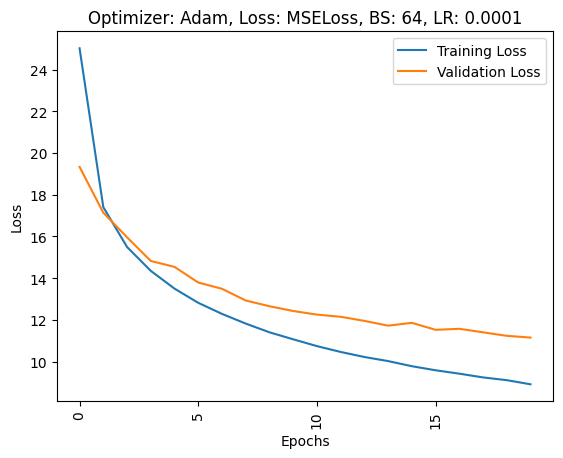

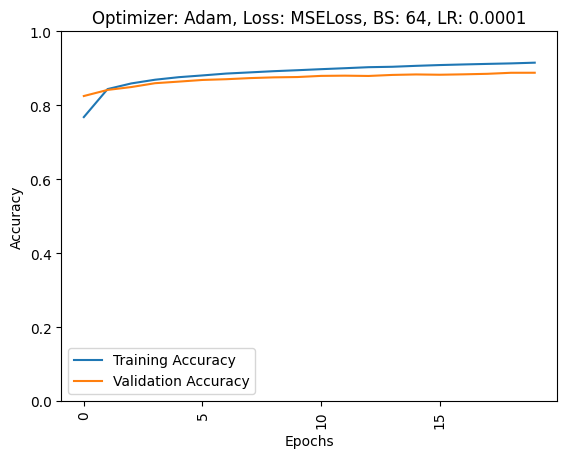

In [11]:
# Training the model
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://torcheeg.readthedocs.io/en/stable/generated/torcheeg.trainers.ClassifierTrainer.html
trainer = ClassifierTrainer(model=model, train_dataset=train_dataset, val_dataset=val_dataset,
                            loss_function=loss_function, batch_size=BATCH_SIZE, n_epochs=EPOCHS, optimizer=OPTIMIZER, path_prefix="")

train_loss, validation_loss, train_accuracy, validation_accuracy = trainer.train_loop()
trainer.plot_losses(train_loss, validation_loss)
trainer.plot_accuracies(train_accuracy, validation_accuracy)
#print("3 hidden layers, full dataset, LR = 0.0001")

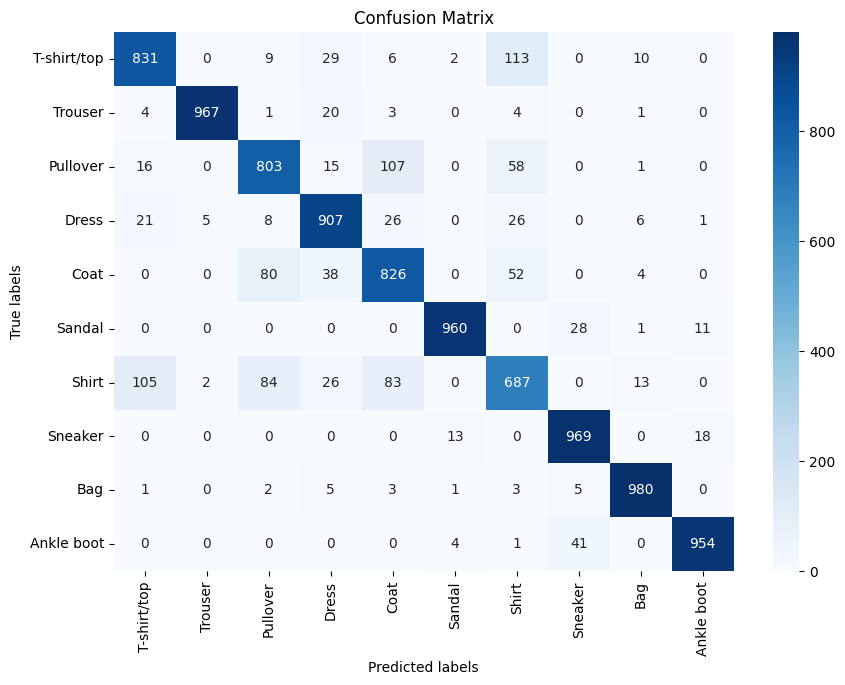

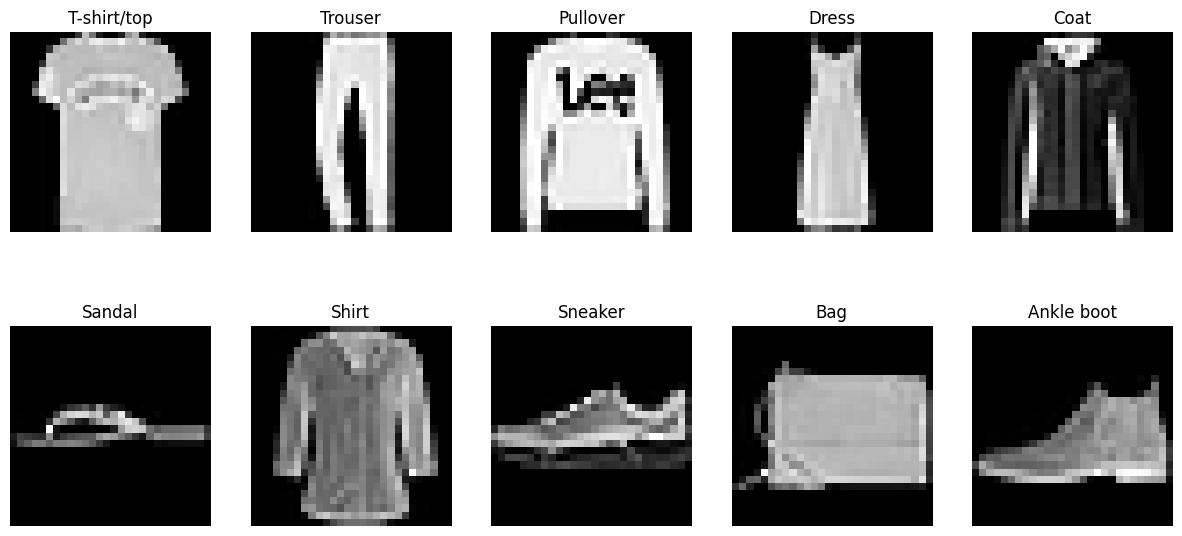

In [13]:
# Plot the confusion matrix and visualize samples from each class
y_true = [y for _, y in val_dataset]
y_pred = []
for img, _ in val_dataset:
    img = img
    y_pred.append(model(img).argmax().item())

plot_confusion_matrix(y_true, y_pred, classes=fashion_mnist_train.classes)
visualize_classes(fashion_mnist_val)